In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


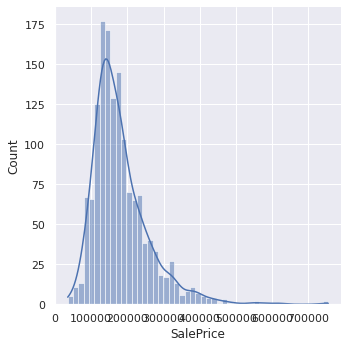

In [5]:
# Analyize target variable 'SalePrice'
sns.displot(df_train['SalePrice'], kde=True)
print('Skewness: {}'.format(df_train['SalePrice'].skew()))
print('Kurtosis: {}'.format(df_train['SalePrice'].kurt()))

In [6]:
# Find out the features which correlated parameter is greater than 0.3
corr = df_train.corr()
correlated_features = list(corr[corr['SalePrice']>0.5].index)
print(correlated_features)
print(len(correlated_features))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
11


In [7]:
# Focus on the correlated features
train_correlated_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
test_correlated_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

df_train = df_train[train_correlated_features]
df_test = df_test[test_correlated_features]
print(df_train.shape)
print(df_test.shape)

(1460, 19)
(1459, 18)


In [8]:
# Check null values in train dataset
df_train.isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
FullBath          0
OpenPorchSF       0
WoodDeckSF        0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
GrLivArea         0
OverallQual       0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtFinSF1        0
YearRemodAdd      0
YearBuilt         0
SalePrice         0
dtype: int64

In [9]:
# Since all features are numerical, fill the null values with mean value
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=train_correlated_features)
df_train.isna().sum().sort_values(ascending=False)

LotFrontage     0
FullBath        0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
GrLivArea       0
OverallQual     0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

In [10]:
# Check null values in test dataset
df_test.isnull().sum().sort_values(ascending=False)

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
GarageArea        1
BsmtFinSF1        1
TotalBsmtSF       1
GarageCars        1
TotRmsAbvGrd      0
WoodDeckSF        0
Fireplaces        0
GrLivArea         0
FullBath          0
OverallQual       0
2ndFlrSF          0
1stFlrSF          0
YearRemodAdd      0
YearBuilt         0
OpenPorchSF       0
dtype: int64

In [11]:
# Since all features in training dataset is numerical, fill the missing data with mean value
df_test = pd.DataFrame(imputer.fit_transform(df_test), columns=df_test.columns)
df_test.isna().sum().sort_values(ascending=False)

LotFrontage     0
OverallQual     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OpenPorchSF     0
dtype: int64

In [12]:
# Split the train dataset into train and test samples
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer


X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 18), (438, 18), (1022,), (438,))

In [13]:
# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
dt_pipe = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeRegressor())])
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
gb_pipe = Pipeline([('scaler', StandardScaler()), ('rf', GradientBoostingRegressor())])
xgb_pipe = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])

cv = KFold(n_splits=10, shuffle=True, random_state=123)

lr_rmse = round(-cross_val_score(lr_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
lr_r2 = round(cross_val_score(lr_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

dt_rmse = round(-cross_val_score(dt_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
dt_r2 = round(cross_val_score(dt_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

rf_rmse = round(-cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
rf_r2 = round(cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

gb_rmse = round(-cross_val_score(gb_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
gb_r2 = round(cross_val_score(gb_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

xgb_rmse = round(-cross_val_score(xgb_pipe, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean(), 2)
xgb_r2 = round(cross_val_score(xgb_pipe, X_train, y_train, cv=cv, scoring='r2').mean(), 2)

summary_dict = {'RMSE': [lr_rmse, dt_rmse, rf_rmse, gb_rmse, xgb_rmse],
                'R2 score': [lr_r2, dt_r2, rf_r2, gb_r2, xgb_r2]}

summary = pd.DataFrame(data=summary_dict, index=['Linear regression', 'Decision Tree', 'Random forest', 'Gradient boosting', 'XGBRegressor'])
summary

,RMSE,R2 score
Linear regression,39936.92,0.72
Decision Tree,46484.62,0.69
Random forest,32097.15,0.83
Gradient boosting,28366.78,0.87
XGBRegressor,34492.73,0.80


In [14]:
# Predict the test set
gb_pipe.fit(X_train, y_train)
test_pred = gb_pipe.predict(df_test)
test_pred = pd.DataFrame(test_pred, columns=['SalePrice'])
test_pred

,SalePrice
0,124380.823961
1,155252.966953
2,174438.659674
3,179577.632018
4,195770.345626
...,...
1454,66812.286302
1455,85392.390564
1456,184197.503778
1457,117927.693990


In [15]:
# Get the 'Id' column from the original test dataset
# Combine 'Id' and the prediction into a new dataframe
test_id = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')['Id']

result = pd.concat([test_id, test_pred], axis=1)
result.head()

,Id,SalePrice
0,1461,124380.823961
1,1462,155252.966953
2,1463,174438.659674
3,1464,179577.632018
4,1465,195770.345626


In [16]:
result.to_csv('submission.csv', index=False)